In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./xAPI-Edu-Data.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
## Reading dataset general information:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
# convert text data to numeric based on unique values
def convert_text_to_numeric(df):
    # make empty dataframe
    new_df = pd.DataFrame()
    for column in df.columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            print(unique_elements)
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))
            new_df[column] = df[column]
    return df, new_df

df5_numeric, df_categorical = convert_text_to_numeric(data.copy())
df_categorical

{'F', 'M'}
{'USA', 'Tunis', 'Iraq', 'lebanon', 'Morocco', 'Lybia', 'Jordan', 'venzuela', 'Syria', 'Palestine', 'KW', 'Egypt', 'Iran', 'SaudiArabia'}
{'USA', 'Tunis', 'Iraq', 'lebanon', 'Morocco', 'Lybia', 'Jordan', 'venzuela', 'Syria', 'Palestine', 'KuwaIT', 'Egypt', 'Iran', 'SaudiArabia'}
{'HighSchool', 'lowerlevel', 'MiddleSchool'}
{'G-02', 'G-10', 'G-12', 'G-05', 'G-07', 'G-08', 'G-06', 'G-11', 'G-09', 'G-04'}
{'B', 'A', 'C'}
{'Arabic', 'Biology', 'Spanish', 'History', 'English', 'Geology', 'French', 'Math', 'Science', 'IT', 'Quran', 'Chemistry'}
{'F', 'S'}
{'Father', 'Mum'}
{'No', 'Yes'}
{'Bad', 'Good'}
{'Under-7', 'Above-7'}
{'H', 'L', 'M'}


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,10,10,1,9,1,9,0,0,1,1,0,2
1,1,10,10,1,9,1,9,0,0,1,1,0,2
2,1,10,10,1,9,1,9,0,0,0,0,1,1
3,1,10,10,1,9,1,9,0,0,0,0,1,1
4,1,10,10,1,9,1,9,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,6,6,2,5,1,11,1,0,0,0,1,1
476,0,6,6,2,5,1,5,0,0,0,0,0,2
477,0,6,6,2,5,1,5,1,0,0,0,0,2
478,0,6,6,2,5,1,3,0,0,0,0,1,1


In [5]:
numerical_colums = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
data_numeric = df5_numeric[numerical_colums]
data_categorical = df5_numeric.drop(numerical_colums, axis=1)
data_numeric.head()
data_categorical.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,10,10,1,9,1,9,0,0,1,1,0,2
1,1,10,10,1,9,1,9,0,0,1,1,0,2
2,1,10,10,1,9,1,9,0,0,0,0,1,1
3,1,10,10,1,9,1,9,0,0,0,0,1,1
4,1,10,10,1,9,1,9,0,0,0,0,1,2


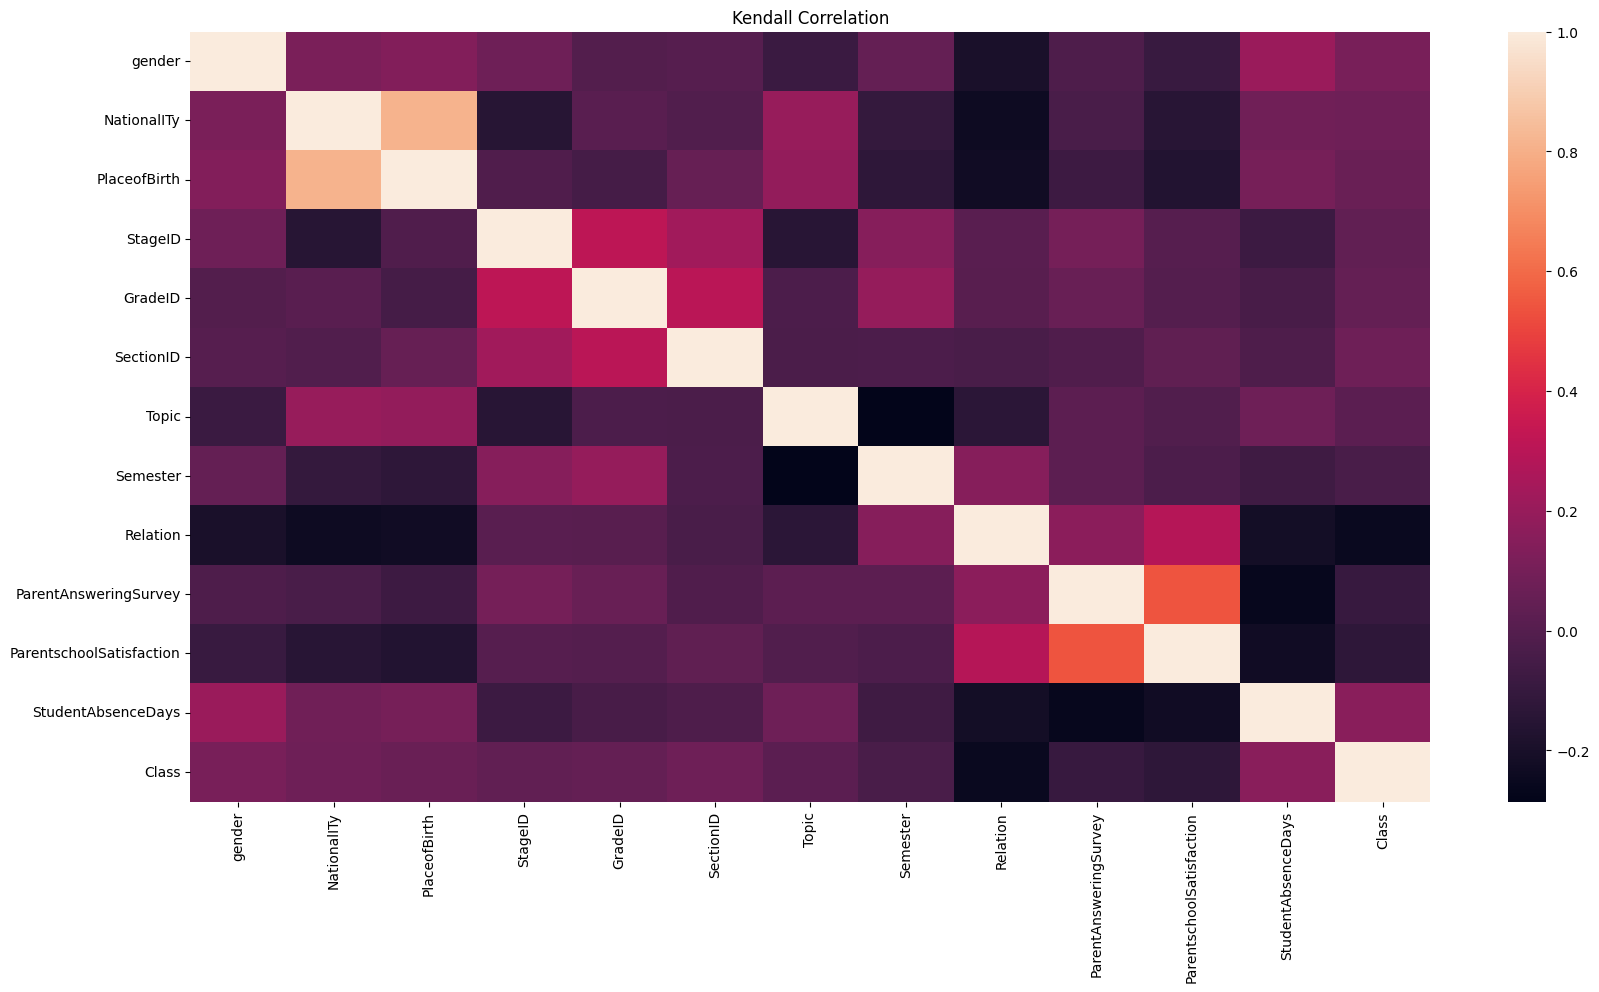

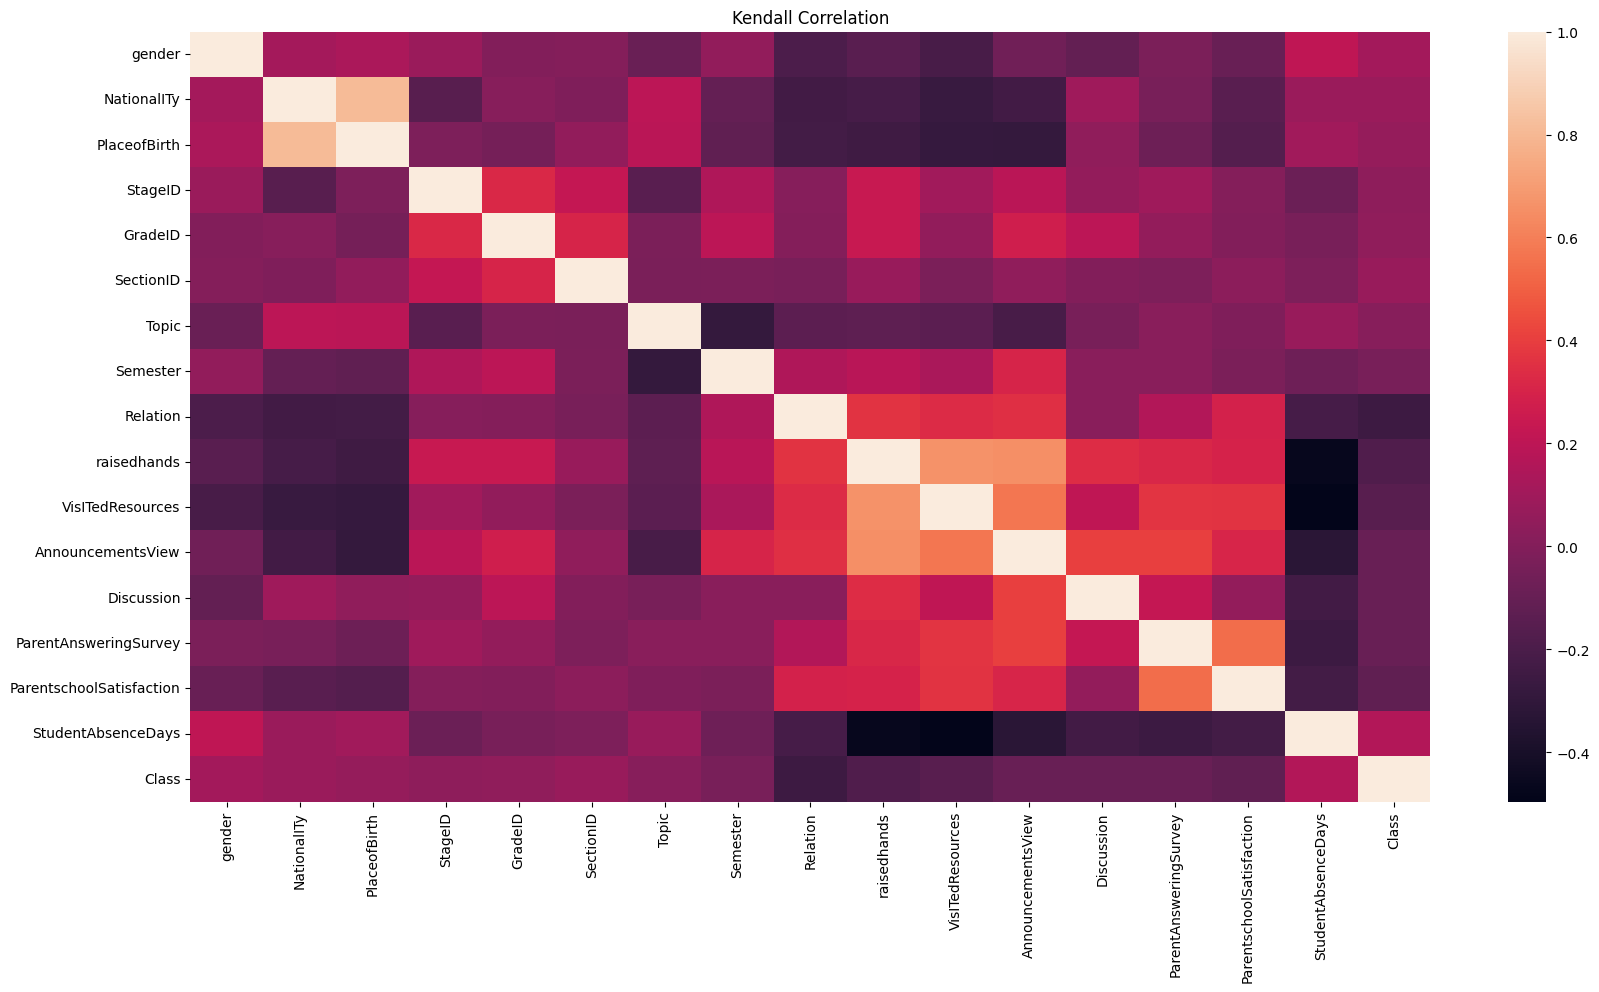

In [6]:
# plot kendall correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df_categorical.corr(method='spearman'))
plt.title('Kendall Correlation')
plt.show()

# plot kendall correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df5_numeric.corr(method='spearman'))
plt.title('Kendall Correlation')
plt.show()


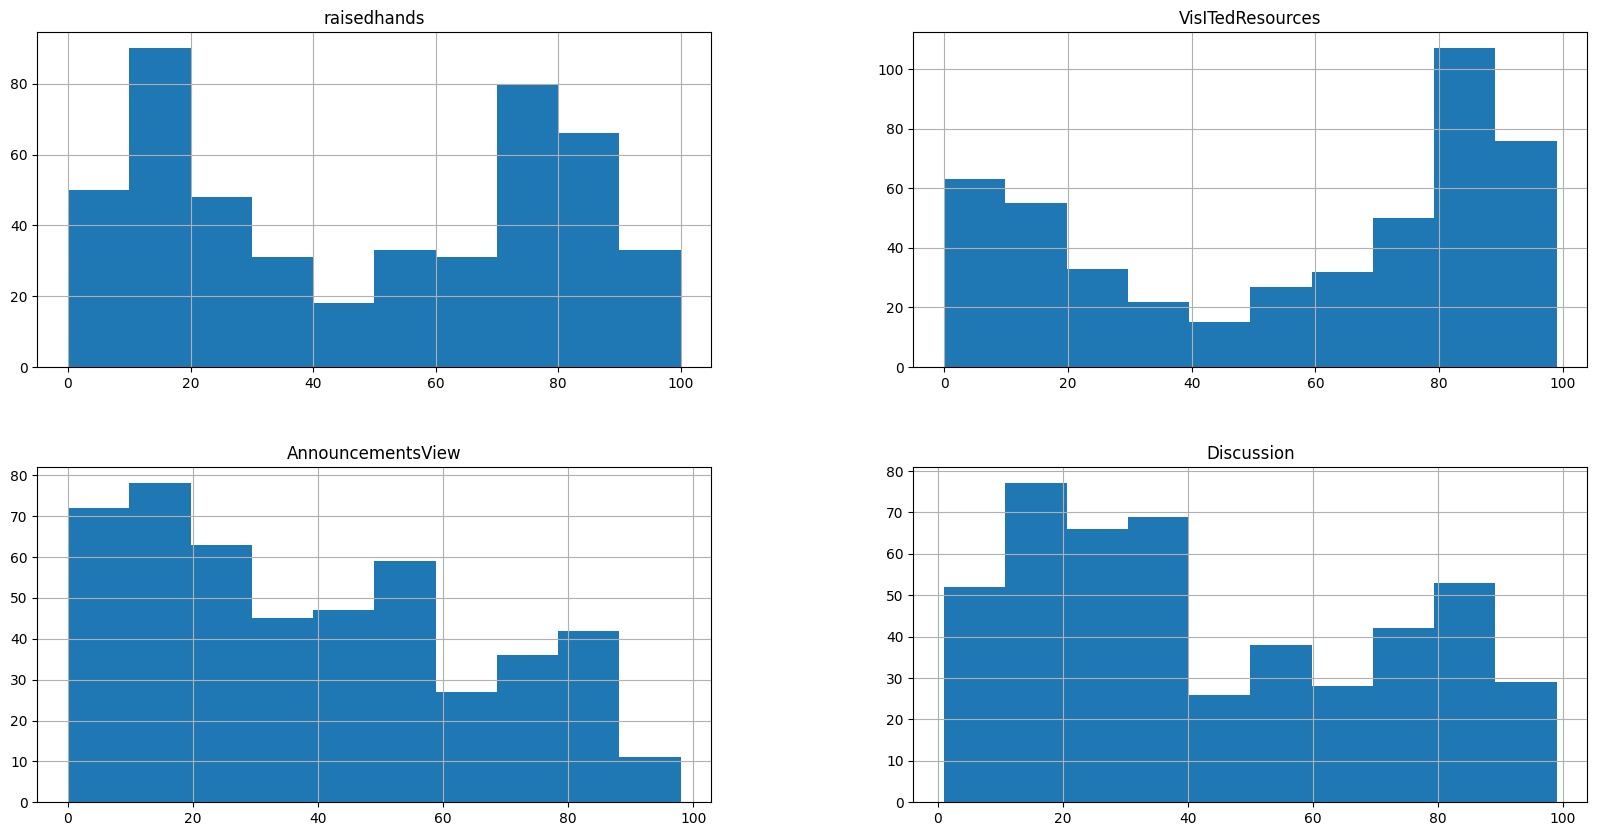

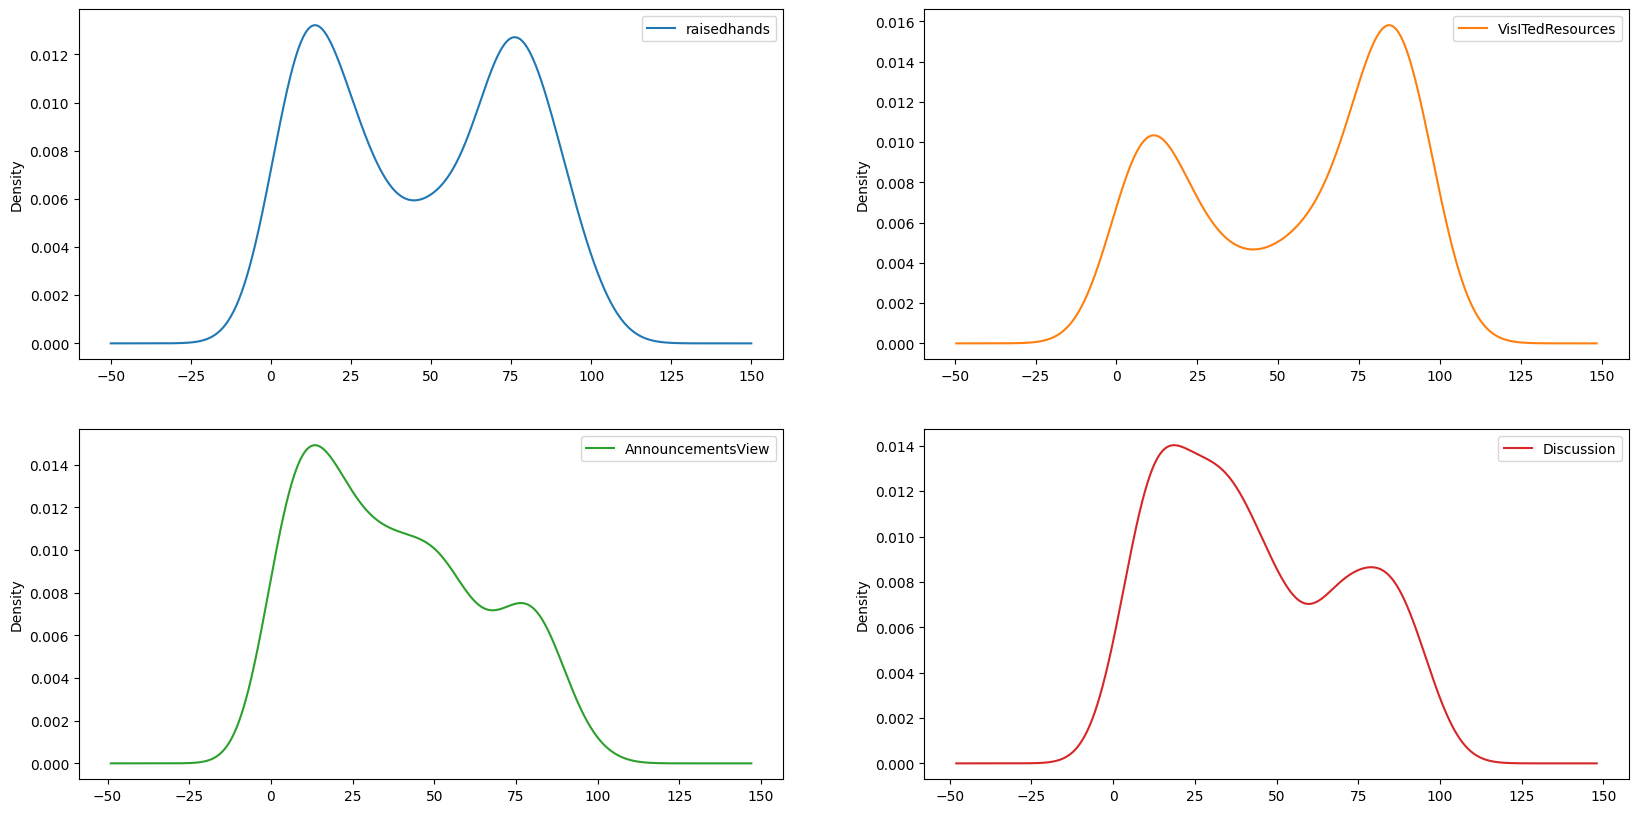

In [7]:
# plot histogram of numeric data
data_numeric.hist(figsize=(20, 10))
plt.show()

# extimate a probability density function
data_numeric.plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize=(20, 10))
plt.show()

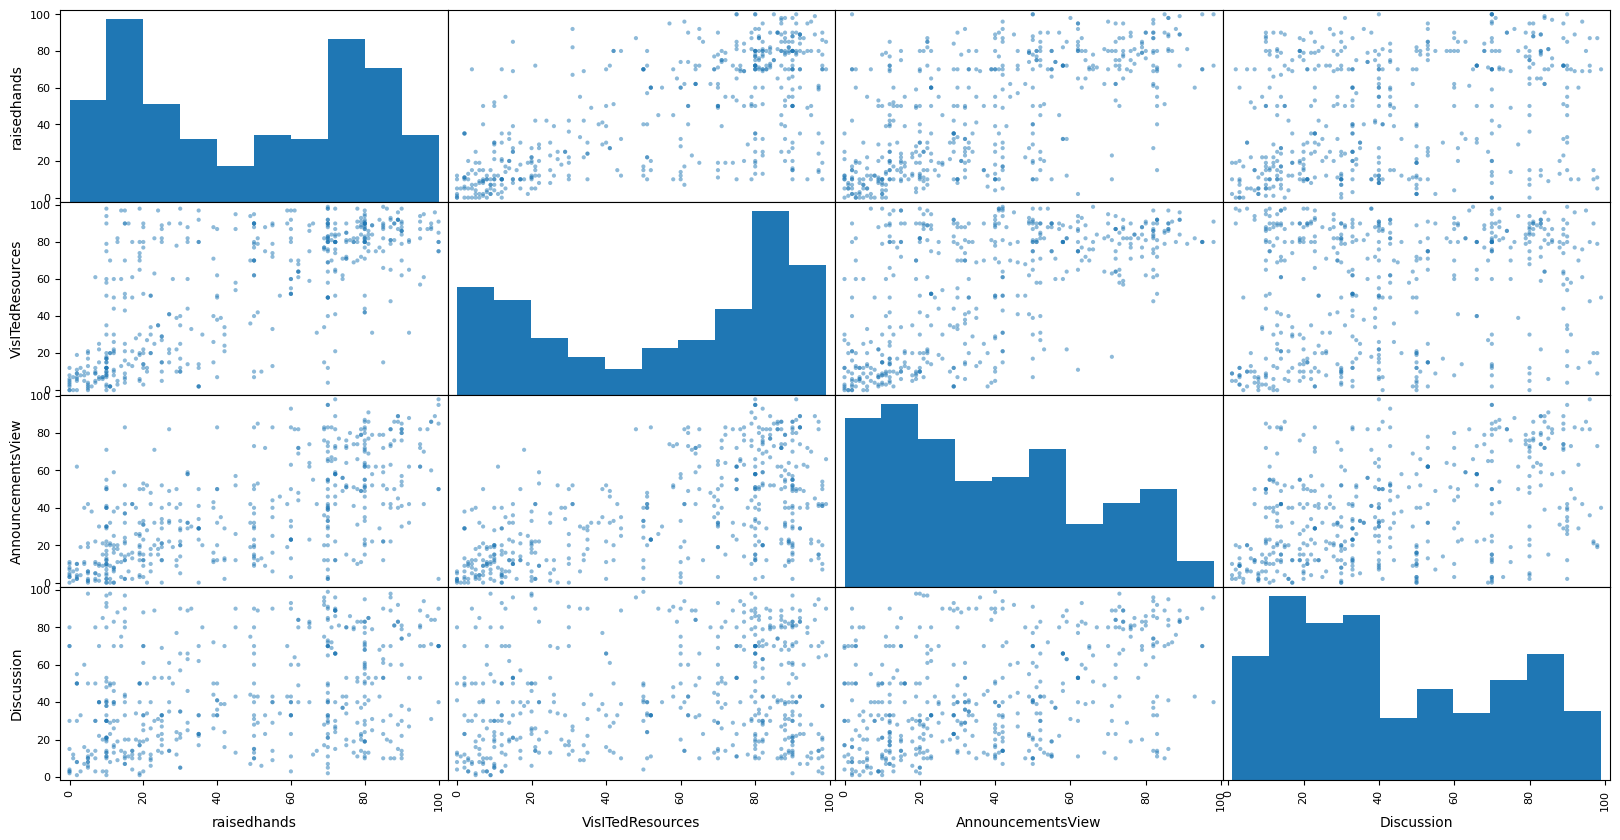

In [8]:
# scatter plot of numeric data
pd.plotting.scatter_matrix(data_numeric, figsize=(20, 10))
plt.show()

/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


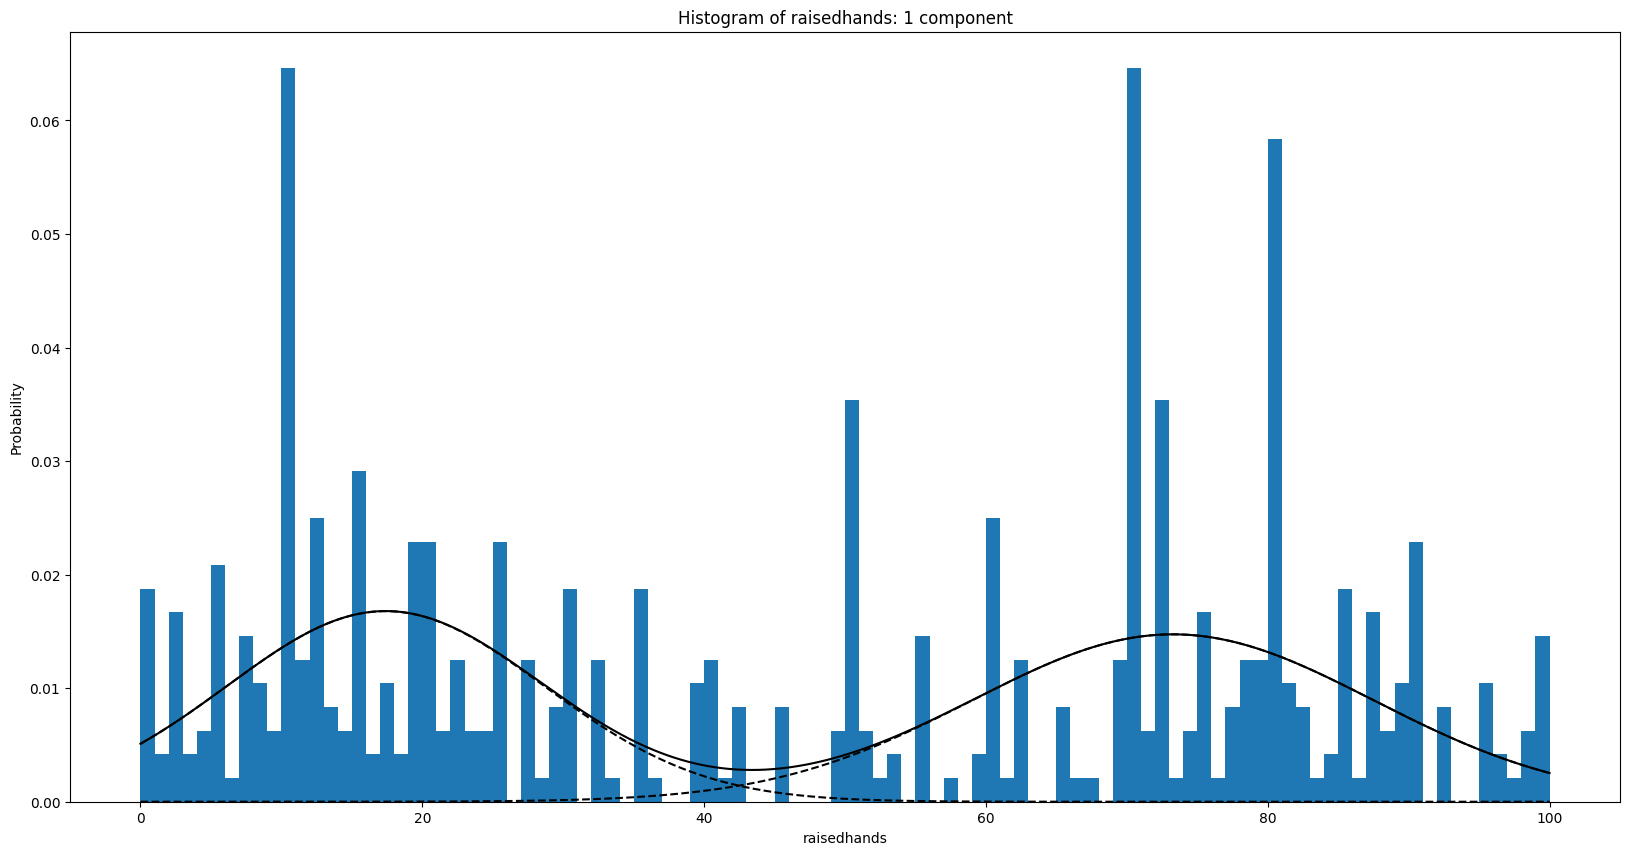

/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


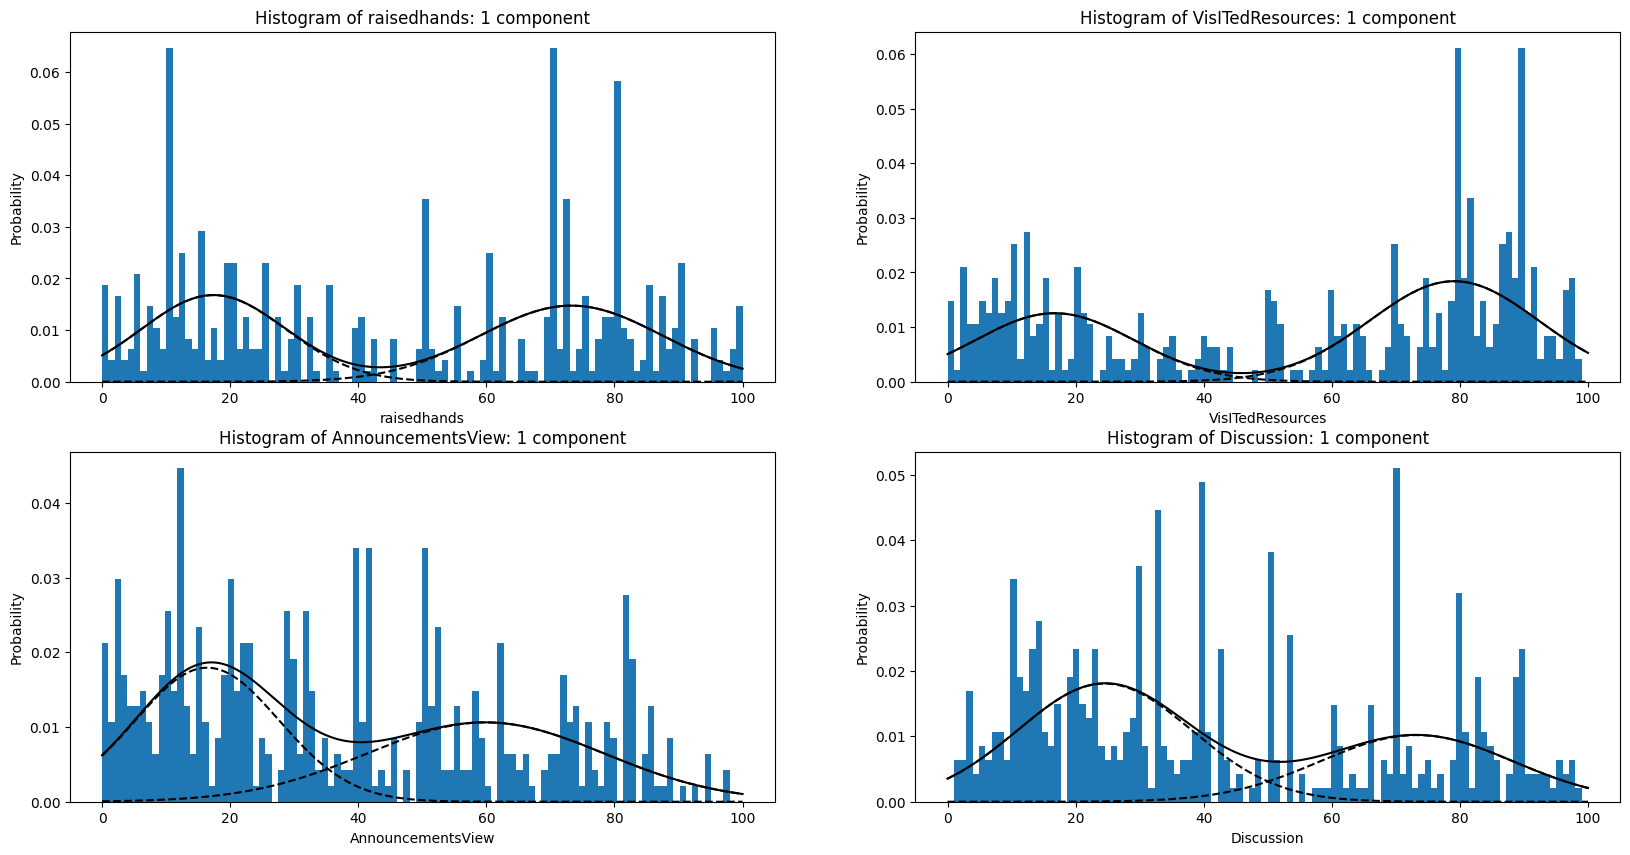

In [15]:
## estimate a GMM model on numeric data
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(data_numeric[['raisedhands']])
# plot the probability density functions of the GMM model with the histogram of the data
x = np.linspace(0, 100, 1000)
logprob = gmm.score_samples(x.reshape(-1, 1))
responsibilities = gmm.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]
plt.figure(figsize=(20, 10))
plt.hist(data_numeric['raisedhands'], 100, density=True)
plt.plot(x, pdf, '-k')
plt.plot(x, pdf_individual, '--k')
plt.xlabel('raisedhands')
plt.ylabel('Probability')
plt.title('Histogram of raisedhands: 1 component')
plt.show()


# do the above for all numeric data
gmms = []
for column in data_numeric.columns:
    gmm = GaussianMixture(n_components=2, covariance_type='full')
    gmm.fit(data_numeric[[column]])
    gmms.append(gmm)

# plot the probability density functions of the GMM model with the histogram of the data as subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
for i, column in enumerate(data_numeric.columns):
    x = np.linspace(0, 100, 1000)
    logprob = gmms[i].score_samples(x.reshape(-1, 1))
    responsibilities = gmms[i].predict_proba(x.reshape(-1, 1))
    pdf = np.exp(logprob)
    pdf_individual = responsibilities * pdf[:, np.newaxis]
    axs[i//2, i%2].hist(data_numeric[column], 100, density=True)
    axs[i//2, i%2].plot(x, pdf, '-k')
    axs[i//2, i%2].plot(x, pdf_individual, '--k')
    axs[i//2, i%2].set_xlabel(column)
    axs[i//2, i%2].set_ylabel('Probability')
    axs[i//2, i%2].set_title('Histogram of {}: 1 component'.format(column))
plt.show()

In [15]:
# convert categorical data to frequency values
data_categorical = data_categorical.apply(lambda x: x.value_counts())
# data_categorical

# create expected value contingency table
expected = pd.DataFrame()
for column in data_categorical.columns:
    expected[column] = data_categorical[column] / data_categorical[column].sum()
expected


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
1.0,NaN,0.071429,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,0.071429,0.071429,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,0.214286,0.214286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,NaN,0.071429,0.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,NaN,NaN,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11.0,NaN,0.071429,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12.0,NaN,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


chi2:  33.326236065889375
p:  5.79828805474192e-08
dof:  2
ex:  [[134.07291667  76.92708333]
 [ 90.22916667  51.77083333]
 [ 80.69791667  46.30208333]]

chi2:  73.84032005687038
p:  1.802272458215712e-06
dof:  26
ex:  [[ 9.67083333 12.30833333  7.47291667  2.6375      3.07708333  0.43958333
   2.6375      1.75833333  2.6375      3.95625     4.83541667 75.60833333
   5.275      78.68541667]
 [ 6.50833333  8.28333333  5.02916667  1.775       2.07083333  0.29583333
   1.775       1.18333333  1.775       2.6625      3.25416667 50.88333333
   3.55       52.95416667]
 [ 5.82083333  7.40833333  4.49791667  1.5875      1.85208333  0.26458333
   1.5875      1.05833333  1.5875      2.38125     2.91041667 45.50833333
   3.175      47.36041667]]

chi2:  75.5134955377122
p:  1.0118259723652516e-06
dof:  26
ex:  [[ 9.67083333  4.39583333 79.125       8.35208333  7.03333333  2.6375
   0.43958333  2.6375      1.75833333  2.6375      3.95625     7.03333333
  77.36666667  3.95625   ]
 [ 6.50833333  2.95

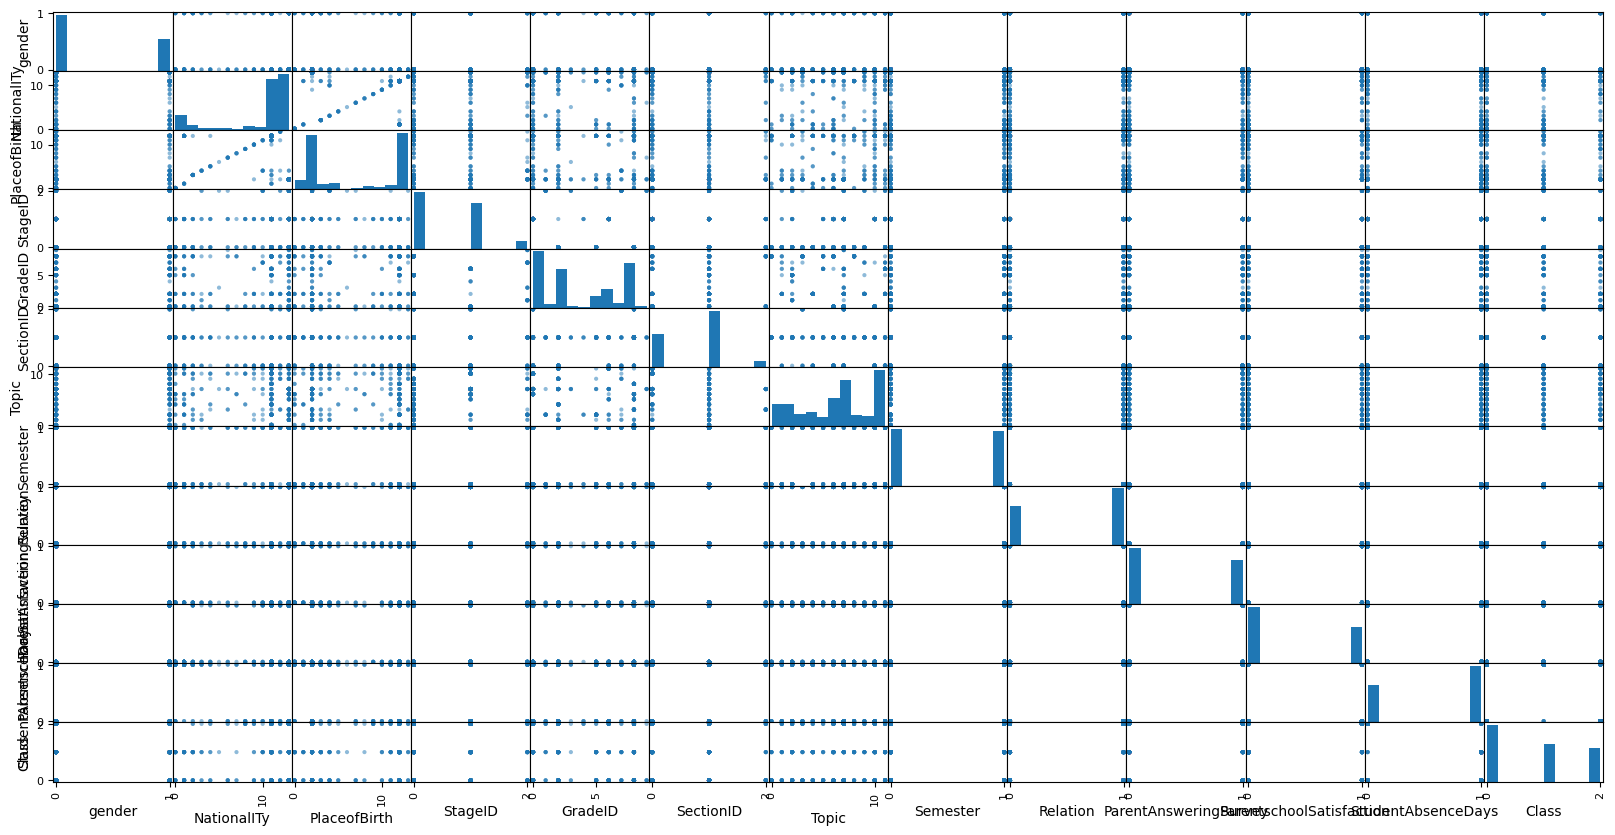

In [13]:
## chi-square test of independence for correlation between categorical data
from scipy.stats import chi2_contingency
from scipy.stats import chi2

df = data_categorical.copy()

# calculate chi2 for each column
for column in df.columns:
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['Class'], df[column]))
    print('chi2: ', chi2)
    print('p: ', p)
    print('dof: ', dof)
    print('ex: ', ex)
    print('')

# plot scatter matrix
pd.plotting.scatter_matrix(data_categorical, figsize=(20, 10))
plt.show()


### Observations:
- The distribution of the data is not normal, so we cannot use parametric tests.

In [12]:
## Perform Hypothesis Testing
from scipy import stats
import numpy as np

## 1. Is there a significant difference in the average grade of students who are absent and those who are present?
## H0: There is no significant difference in the average grade of students who are absent and those who are present.
## H1: There is a significant difference in the average grade of students who are absent and those who are present.

# run t-test
stats.ttest_ind(df5_numeric[df5_numeric['Class']=='L']['GradeID'], df5_numeric[df5_numeric['Class']=='M']['GradeID'])

# run ANOVA
stats.f_oneway(df5_numeric[df5_numeric['Class']=='L']['GradeID'], df5_numeric[df5_numeric['Class']=='M']['GradeID'])

/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)